In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.providers.ibmq import least_busy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
grover_circuit = QuantumCircuit(2)

In [3]:
def init_state(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

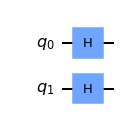

In [4]:
grover_circuit = init_state(grover_circuit, [0, 1])
grover_circuit.draw("mpl")

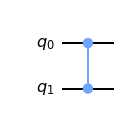

In [5]:
def oracle(qc, qubits):
    qc.cz(qubits[0], qubits[1])
qc = QuantumCircuit(2)
oracle(qc, [0, 1])
qc.draw("mpl")    

In [6]:
def diffusion(qc, qubits):
    qc.h([0, 1])

    qc.z([0, 1])
    qc.cz(0, 1)

    qc.h([0, 1])

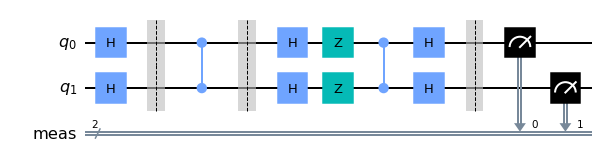

In [7]:
grover_circuit.barrier()
oracle(grover_circuit, [0, 1])
grover_circuit.barrier()
diffusion(grover_circuit, [0, 1])
grover_circuit.measure_all()
grover_circuit.draw("mpl")

In [8]:
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
statevec

Statevector([-0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              1.-2.4492936e-16j],
            dims=(2, 2))


In [9]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

C:\Users\drith\AppData\Local\Temp/ipykernel_20084/3614903350.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


Running on current least busy device:  ibmq_quito


In [10]:
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


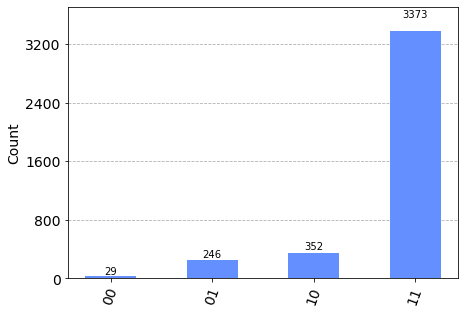

In [11]:
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)